In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels as sm

In [3]:
# read dataset
df = pd.read_csv('../datasets/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Pandas Functions

In [4]:
print(df.shape) # shape
print(df.columns) # column names
print(df.dtypes) # data types


(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
print(df.describe()) # summary
print(df.groupby('Species').size()) # group by

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [6]:
print(df.query('SepalLengthCm > 7.0').head()) # query

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
102  103            7.1           3.0            5.9           2.1   
105  106            7.6           3.0            6.6           2.1   
107  108            7.3           2.9            6.3           1.8   
109  110            7.2           3.6            6.1           2.5   
117  118            7.7           3.8            6.7           2.2   

            Species  
102  Iris-virginica  
105  Iris-virginica  
107  Iris-virginica  
109  Iris-virginica  
117  Iris-virginica  


In [7]:
df.insert(0, 'Lolok', range(1, 1 + len(df))) # insert column
print(df.head())
# cumsum
df['SepalLengthCmCumSum'] = df['SepalLengthCm'].cumsum()
print(df.head())

   Lolok  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1   1            5.1           3.5            1.4           0.2   
1      2   2            4.9           3.0            1.4           0.2   
2      3   3            4.7           3.2            1.3           0.2   
3      4   4            4.6           3.1            1.5           0.2   
4      5   5            5.0           3.6            1.4           0.2   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
   Lolok  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1   1            5.1           3.5            1.4           0.2   
1      2   2            4.9           3.0            1.4           0.2   
2      3   3            4.7           3.2            1.3           0.2   
3      4   4            4.6           3.1            1.5           0.2   
4      5   5            5.0           3.6            1.4           0.2   

       S

In [8]:
df.where(df['SepalLengthCm'] > 7.0).dropna().head() # where

,Lolok,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCmCumSum
102,103.0,103.0,7.1,3.0,5.9,2.1,Iris-virginica,566.3
105,106.0,106.0,7.6,3.0,6.6,2.1,Iris-virginica,586.7
107,108.0,108.0,7.3,2.9,6.3,1.8,Iris-virginica,598.9
109,110.0,110.0,7.2,3.6,6.1,2.5,Iris-virginica,612.8
117,118.0,118.0,7.7,3.8,6.7,2.2,Iris-virginica,664.6


In [11]:
# isin
df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor'])].head(100)


,Lolok,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCmCumSum
0,1,1,5.1,3.5,1.4,0.2,Iris-setosa,5.1
1,2,2,4.9,3.0,1.4,0.2,Iris-setosa,10.0
2,3,3,4.7,3.2,1.3,0.2,Iris-setosa,14.7
3,4,4,4.6,3.1,1.5,0.2,Iris-setosa,19.3
4,5,5,5.0,3.6,1.4,0.2,Iris-setosa,24.3
...,...,...,...,...,...,...,...,...
95,96,96,5.7,3.0,4.2,1.2,Iris-versicolor,524.4
96,97,97,5.7,2.9,4.2,1.3,Iris-versicolor,530.1
97,98,98,6.2,2.9,4.3,1.3,Iris-versicolor,536.3
98,99,99,5.1,2.5,3.0,1.1,Iris-versicolor,541.4


# NumPy Functions

In [14]:
# 1d array
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(a)
print(a[0:3])
print(a.shape)
a[0]=100
print(a)

[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3]
(10,)
[100   2   3   4   5   6   7   8   9  10]


In [15]:
# 2d array
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(b)
print(b[0:2, 0:2])
print(b.shape)
b[0, 0] = 100
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2]
 [4 5]]
(3, 3)
[[100   2   3]
 [  4   5   6]
 [  7   8   9]]


In [20]:
a = np.zeros((2, 2)) # create array of zeros
print(a)
b = np.ones((1, 2)) # create array of ones
print(b)
c = np.full((2, 2), 7) # create constant array
print(c)
d = np.random.random((2, 2)) # create array filled with random values
print(d)


[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[0.40741505 0.39578439]
 [0.56725837 0.27174839]]


In [22]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a>2)
print(a[a>2])

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]


In [23]:
x = np.array([1, 2]) # let numpy choose the datatype
print(x.dtype)
x = np.array([1.0, 2.0]) # let numpy choose the datatype
print(x.dtype)

int32
float64


In [34]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
print(x + y) # print(np.add(x, y))
print(x - y) # print(np.subtract(x, y))

print(np.sum(x)) # compute sum of all elements
print(np.sum(x, axis=0)) # compute sum of each column
print(np.sum(x, axis=1)) # compute sum of each row
print(np.mean(x)) # compute mean of all elements
print(np.reshape(x, (4, 1))) # reshape
print(np.transpose(x)) # transpose
print(np.concatenate((x, y), axis=0)) # concatenate

[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]
10
[4 6]
[3 7]
2.5
[[1]
 [2]
 [3]
 [4]]
[[1 3]
 [2 4]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [35]:
np.dot(x, y) # matrix multiplication

array([[19, 22],
       [43, 50]])

# SciPy Functions

In [45]:
from scipy import special, sparse
a = special.exp10(3) # 10^3
print(a)
b = special.exp2(3) # 2^3
print(b)
c = special.sindg(90) # sin(90)
print(c)
d = special.comb(5, 3) # 5C3
print(d)
e = special.cbrt([1, 8, 27]) # cube root
print(e)
ar = np.array([[1,2], [3,4]])
f = special.softmax(ar) # softmax
print(f)
g = sparse.csc_array([[1, 0, 0], [0, 2, 0], [1, 1, 3]]) # sparse matrix
print(g)

1000.0
8.0
1.0
10.0
[1. 2. 3.]
[[0.0320586  0.08714432]
 [0.23688282 0.64391426]]
  (0, 0)	1
  (2, 0)	1
  (1, 1)	2
  (2, 1)	1
  (2, 2)	3


In [46]:
from scipy import linalg
a = np.array([[1, 2], [3, 4]])
print(linalg.inv(a)) # inverse
b = np.array([[6, 23], [-1, 7]])
print(linalg.solve(a, b)) # solve linear system


[[-2.   1. ]
 [ 1.5 -0.5]]
[[-13.  -39. ]
 [  9.5  31. ]]


# StatsModels Functions

In [60]:
from statsmodels import api as sm

# load dataset
df = sm.datasets.get_rdataset("iris", "datasets").data
print(df.head())

# linear regression
# create a new dataframe manually
df = pd.DataFrame({'SepalLengthCm': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9],
                     'SepalWidthCm': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1]})
print(df.head())

# add constant
df = sm.add_constant(df)
print(df.head())

# ols
model = sm.OLS(df['SepalLengthCm'], df[['const', 'SepalWidthCm']])
results = model.fit()
# print(results.summary())
print(model)
# linear.rainbow
print(sm.stats.linear_rainbow(results))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
   SepalLengthCm  SepalWidthCm
0            5.1           3.5
1            4.9           3.0
2            4.7           3.2
3            4.6           3.1
4            5.0           3.6
   const  SepalLengthCm  SepalWidthCm
0    1.0            5.1           3.5
1    1.0            4.9           3.0
2    1.0            4.7           3.2
3    1.0            4.6           3.1
4    1.0            5.0           3.6
(1.2958621908127168, 0.4424937932227852)


# Matplotlib Functions

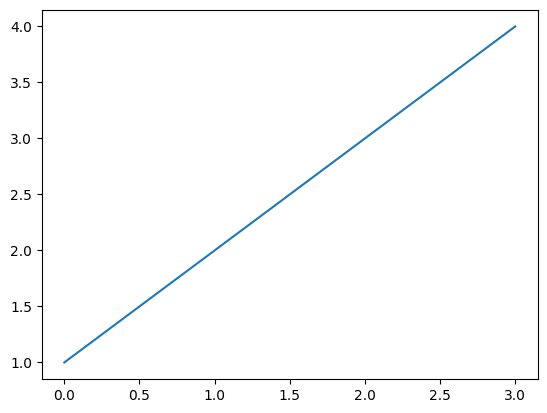

In [63]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])

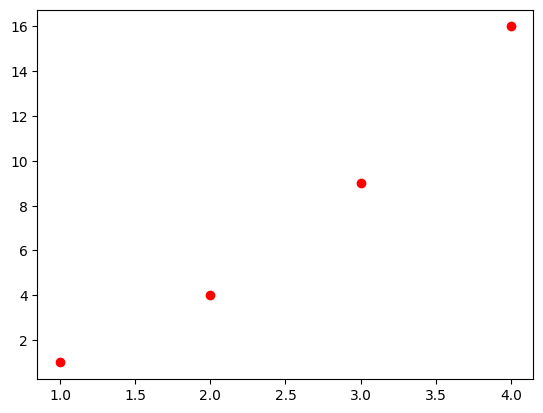

In [65]:
# plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

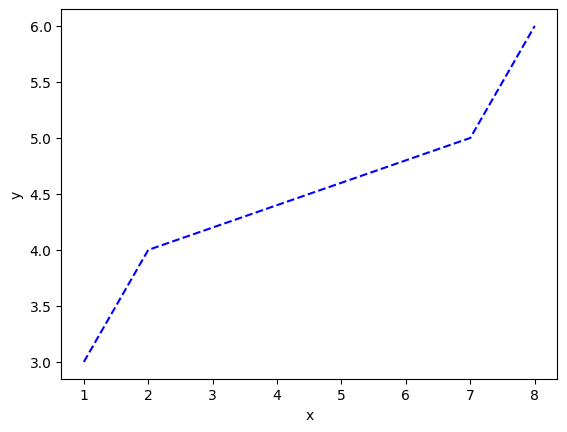

In [69]:
a = np.array([[1, 2, 7,8], [3, 4,5,6]])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(a[0], a[1], 'b--')

       Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65
Test3     70   90   90     82   85


<AxesSubplot: >

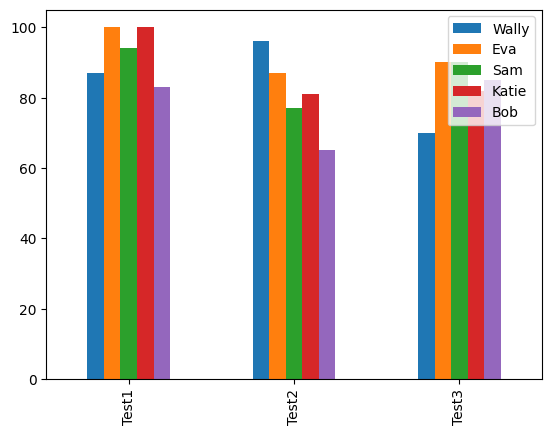

In [76]:
grades = {'Wally': [87, 96, 70], 'Eva': [100, 87, 90], 'Sam': [94, 77, 90], 'Katie': [100, 81, 82], 'Bob': [83, 65, 85]}
df = pd.DataFrame(grades, index=['Test1', 'Test2', 'Test3'])
print(df)
# print all students marks in 3 subjects using bar chart
df.plot(kind='bar')